

# Data Description

Learn computer vision fundamentals with the MNIST dataset

Linnk: https://www.kaggle.com/c/digit-recognizer


The data files `train.csv` and `test.csv` contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783
```

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

```
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir('/content/drive/MyDrive/digit_recognizer')

# os.getcwd()

In [2]:
# import pandas as pd
# import numpy as np

# X_train = pd.read_csv('train.csv')
# X_test = pd.read_csv('test.csv')

# X_train, y_train = X_train.drop(columns='label'), X_train['label']

In [3]:
# X_train.describe()

In [4]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)

# X_train.shape

In [5]:
# X_train = X_train.reshape(-1, 28, 28)

# Loading The data

In [6]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 34s 3us/step


In [7]:
print(f"X_train: {X_train.shape}") 
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}") 
print(f"y_test: {y_test.shape}")

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


# Plot Sample Data

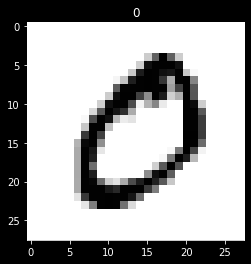

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

sample_id=1
plt.imshow(X_train[sample_id], cmap='binary')
plt.title(y_train[sample_id]);

# Kaggle Data Processing

In [9]:
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import OneHotEncoder

# to_categorical(y_train)

In [10]:
# encoder = OneHotEncoder()
# y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_train,
#     y_train,
#     test_size = 0.1,
#     random_state = 1,
#     stratify = y_train
# )

In [12]:
# X_train.shape, y_train.shape

# Build DNN Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.05)

model = Sequential(
    [
        Input(shape=[28, 28]),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)


model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

history = model.fit(
    X_train, y_train, validation_split=0.2, batch_size=512, epochs=20, shuffle=True, callbacks=[early_stopping_callback]
).history

Epoch 1/20
94/94 [==============================] - 1s 7ms/step - loss: 9.3945 - accuracy: 0.8669 - val_loss: 2.3942 - val_accuracy: 0.9319
Epoch 2/20
94/94 [==============================] - 1s 5ms/step - loss: 1.4959 - accuracy: 0.9433 - val_loss: 1.5348 - val_accuracy: 0.9404
Epoch 3/20
94/94 [==============================] - 1s 5ms/step - loss: 0.7329 - accuracy: 0.9618 - val_loss: 1.3257 - val_accuracy: 0.9475
Epoch 4/20
94/94 [==============================] - 1s 5ms/step - loss: 0.3956 - accuracy: 0.9739 - val_loss: 1.2056 - val_accuracy: 0.9522
Epoch 5/20
94/94 [==============================] - 1s 5ms/step - loss: 0.2713 - accuracy: 0.9795 - val_loss: 1.0998 - val_accuracy: 0.9572
Epoch 6/20
94/94 [==============================] - 1s 5ms/step - loss: 0.1660 - accuracy: 0.9847 - val_loss: 1.0322 - val_accuracy: 0.9590
Epoch 7/20
94/94 [==============================] - 1s 5ms/step - loss: 0.1407 - accuracy: 0.9859 - val_loss: 1.1084 - val_accuracy: 0.9538
Epoch 8/20
94/94 [==

## Plot History

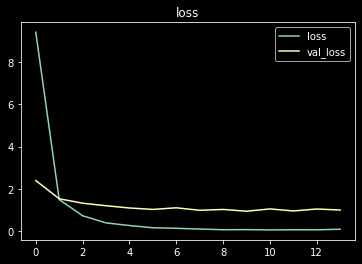

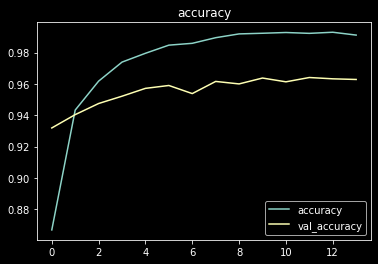

In [14]:
import pandas as pd

history_df = pd.DataFrame(history)

history_df[["loss", "val_loss"]].plot(title='loss')
history_df[["accuracy", "val_accuracy"]].plot(title='accuracy');

## Confusion Matrix

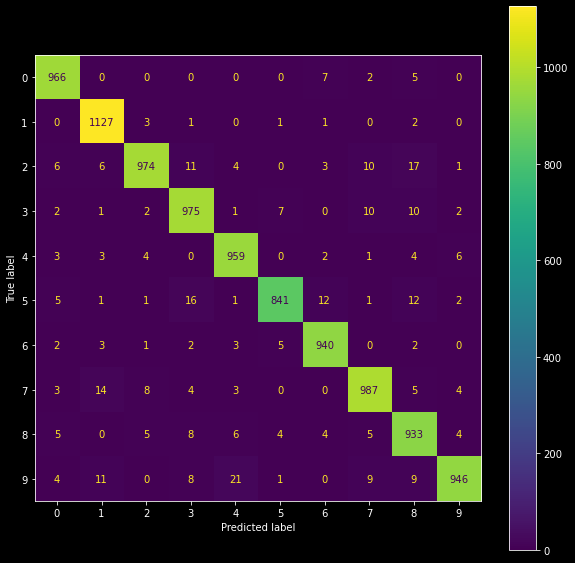

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

cm_disp = ConfusionMatrixDisplay(cm)
_, ax = plt.subplots(figsize=(10,10))
cm_disp.plot(ax=ax)
plt.show()

# Build CNN Model

In [16]:
from tensorflow.keras.layers import Flatten, Dense, Input

# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.05)

model = Sequential(
    [
#         Input(shape=[28, 28]),
#         Flatten(),
#         Dense(512, activation="relu"),
#         Dense(10, activation="softmax"),
    ]
)


model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2, 
    batch_size=512, 
    epochs=20, 
    shuffle=True, 
    callbacks=[early_stopping_callback]
).history

Epoch 1/20


TypeError: in user code:

    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4748 sparse_categorical_crossentropy
        epsilon_ = _constant_to_tensor(epsilon(), output.dtype.base_dtype)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:819 _constant_to_tensor
        return constant_op.constant(x, dtype=dtype)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:263 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:280 _constant_impl
        tensor_util.make_tensor_proto(
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:456 make_tensor_proto
        _AssertCompatible(values, dtype)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:335 _AssertCompatible
        raise TypeError("Expected %s, got %s of type '%s' instead." %

    TypeError: Expected uint8, got 1e-07 of type 'float' instead.


## Plot History

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history)

history_df[["loss", "val_loss"]].plot(title='loss')
history_df[["accuracy", "val_accuracy"]].plot(title='accuracy');

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

cm_disp = ConfusionMatrixDisplay(cm)
_, ax = plt.subplots(figsize=(10,10))
cm_disp.plot(ax=ax)
plt.show()

# Submission Draft

In [ ]:
model.predict(X_test).argmax(axis=1)

In [59]:
import kaggle
import zipfile
# project = 'titanic'
# os.chdir('C:/Users/admin/Desktop')
# if not os.path.isdir('./kaggle_data'):
#     os.mkdir('C:/Users/admin/Desktop/kaggle_data')
# os.chdir('C:/Users/admin/Desktop/kaggle_data')
os.environ['KAGGLE_USERNAME'] = "korwinbieniek"
os.environ['KAGGLE_KEY'] = "dff0699451f214d2508bbf04fe583fd5"
kaggle.api.authenticate()

kaggle.api.dataset_download_files('c/titanic-dataset', path='C:/Users/admin/Desktop/kaggle_data', unzip=True)


# with zipfile.ZipFile('C:/Users/admin/Desktop/kaggle_data/titanic.zip', 'r') as zip_ref:
#     zip_ref.extractall('C:/Users/admin/Desktop/kaggle_data')
# os.remove("titanic.zip")

ApiException: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Content-Type': 'application/json', 'Date': 'Wed, 09 Mar 2022 07:03:01 GMT', 'Access-Control-Allow-Credentials': 'true', 'Set-Cookie': 'ka_sessionid=d439e34cedb9887f533f3d6642adac76; max-age=2626560; path=/, GCLB=CMac2Im96OSlHA; path=/; HttpOnly', 'Transfer-Encoding': 'chunked', 'Vary': 'Accept-Encoding', 'Turbolinks-Location': 'https://www.kaggle.com/api/v1/datasets/download/c/titanic-dataset', 'X-Kaggle-MillisecondsElapsed': '31', 'X-Kaggle-RequestId': 'ae518a40b275f395d034b4572f421e01', 'X-Kaggle-ApiVersion': '1.5.12', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Content-Security-Policy': "object-src 'none'; script-src 'nonce-TlXTNSwkvVghzOyx5ian3Q==' 'report-sample' 'unsafe-inline' 'unsafe-eval' 'strict-dynamic' https: http:; frame-src 'self' https://www.kaggleusercontent.com https://www.youtube.com/embed/ https://polygraph-cool.github.io https://www.google.com/recaptcha/ https://form.jotform.com https://submit.jotform.us https://submit.jotformpro.com https://submit.jotform.com https://www.docdroid.com https://www.docdroid.net https://kaggle-static.storage.googleapis.com https://kaggle-static-staging.storage.googleapis.com https://kkb-dev.jupyter-proxy.kaggle.net https://kkb-staging.jupyter-proxy.kaggle.net https://kkb-production.jupyter-proxy.kaggle.net https://kkb-dev.firebaseapp.com https://kkb-staging.firebaseapp.com https://kkb-production.firebaseapp.com https://kaggle-metastore-test.firebaseapp.com https://kaggle-metastore.firebaseapp.com https://apis.google.com https://content-sheets.googleapis.com/ https://accounts.google.com/ https://storage.googleapis.com https://docs.google.com https://drive.google.com; base-uri 'none'; report-uri https://csp.withgoogle.com/csp/kaggle/20201130;", 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})
HTTP response body: b'{"code":404,"message":"Not found"}'



  0%|          | 0.00/814M [00:00<?, ?B/s]
  0%|          | 1.00M/814M [00:01<21:48, 651kB/s]
  0%|          | 2.00M/814M [00:03<22:00, 645kB/s]
  0%|          | 3.00M/814M [00:04<19:15, 736kB/s]
  0%|          | 4.00M/814M [00:05<16:44, 845kB/s]
  1%|          | 5.00M/814M [00:06<15:20, 921kB/s]
  1%|          | 6.00M/814M [00:07<15:34, 907kB/s]
  1%|          | 7.00M/814M [00:08<15:16, 922kB/s]
  1%|          | 8.00M/814M [00:09<14:10, 993kB/s]
  1%|1         | 9.00M/814M [00:10<15:18, 918kB/s]
  1%|1         | 10.0M/814M [00:11<14:15, 985kB/s]
  1%|1         | 11.0M/814M [00:12<14:33, 963kB/s]
  1%|1         | 12.0M/814M [00:13<13:23, 1.05MB/s]
  2%|1         | 13.0M/814M [00:15<15:26, 906kB/s] 
  2%|1         | 14.0M/814M [00:16<17:51, 783kB/s]
  2%|1         | 15.0M/814M [00:18<19:40, 709kB/s]
  2%|1         | 16.0M/814M [00:19<18:35, 749kB/s]
  2%|2         | 17.0M/814M [00:21<19:28, 715kB/s]
  2%|2         | 18.0M/814M [00:22<18:07, 767kB/s]
  2%|2         | 19.0M/814M [00:23<1

In [ ]:
os.cwd